## Locally Weighted Regression
1) Read and Normalise the Dataset 

2) Generate W for every query point!

3) No training is involved, directly make predictions using closed form solution we dervied!

`(X′WX)inv * X′WY` where X' is X_Transpose

4) Find the best value of Tau(Bandwidth Parameter) [Cross Validation]

## 1. Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib notebook

In [2]:
dfx = pd.read_csv('../../Datasets/Locally Weighted Regression/weightedX.csv')
dfy = pd.read_csv('../../Datasets/Locally Weighted Regression/weightedY.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../Datasets/Locally Weighted Regression/weightedX.csv'

In [3]:
X = dfx.values
Y = dfy.values

In [4]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [5]:
plt.style.use("seaborn")

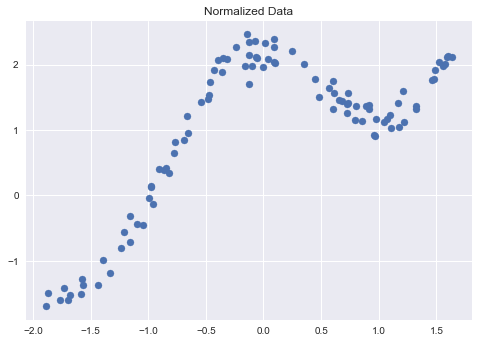

In [6]:
#Normalisze the Data
u = X.mean()
std = X.std()
X = (X-u)/std

plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()


## 2. Find out W (mxm) diagonal matrix

In [7]:
# print(type(np.mat(np.eye(5))))

#a*b ==> a,b --> numpy matrices -->Matrix Multicplication
#a*b ==>? a,b --> numpy arrays --->Element Wise 

In [8]:
"""
    The tau parameter is going to control how the weight is going to vary when we move 
    away from the Query point.
"""
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M)) # Identity Matrix
    
    for i in range(M):
        xi = X[i] #Points from dataset
        x  = query_point
        W[i,i] =  np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [28]:
#a*b ==> a,b --> numpy matrices -->Matrix Multicplication
X=np.mat(X)
Y=np.mat(Y)
print(X.shape,Y.shape)
print(type(X))

W = getW(-1,X,10)
print(W.shape)
print(W)

(99, 1) (99, 1)
<class 'numpy.matrix'>
(99, 99)
[[0.99793522 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99983397 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99791881 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99489427 0.         0.        ]
 [0.         0.         0.         ... 0.         0.98720262 0.        ]
 [0.         0.         0.         ... 0.         0.         0.97564665]]


### 3. Make Predictions
- Since We are not going to learn anything.All the Work is going to be Done at query time.For Every Query Point We are going to get a set of Theta.Total number of predictions is going to be number of test points

In [12]:
def predict(X,Y,query_x,tau):
    #Adding X0=1 column to our X matrix
    M=X.shape[0]
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    #Query Point
    qx = np.mat([query_x,1])
    
    #Weight Matrix
    W = getW(qx,X_,tau)
    
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y)) # Matrix Multiplication
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred
    

In [13]:
theta,pred = predict(X,Y,1.0,1.0)

In [14]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [20]:
#For a Query Point at 1 we are getting the prediction of local minima
print(pred)
print(pred.shape)

[[1.59417694]]
(1, 1)


## 4. Visualise Predictions, Analyse the Effect of Tau

In [16]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0]) #Pred is a matrix
        
    Y_test = np.array(Y_test) # Converting List to numpy array
    
    # Converting X,Y into numpy array
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

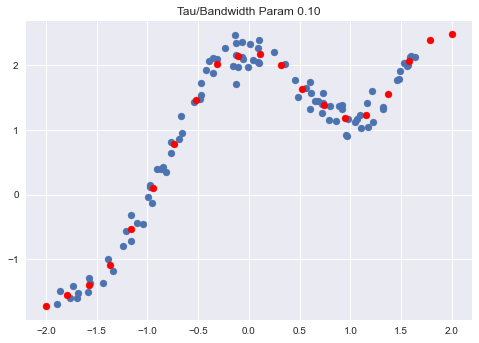

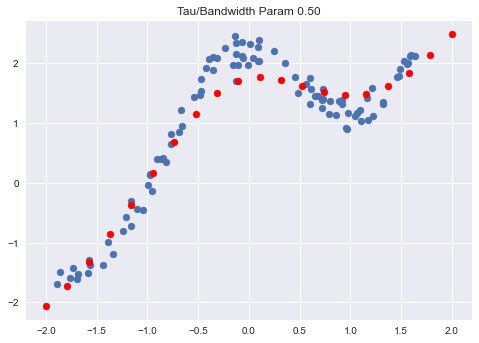

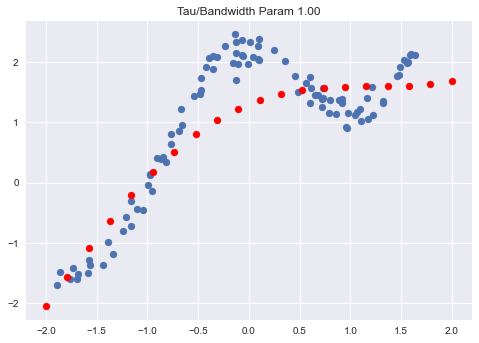

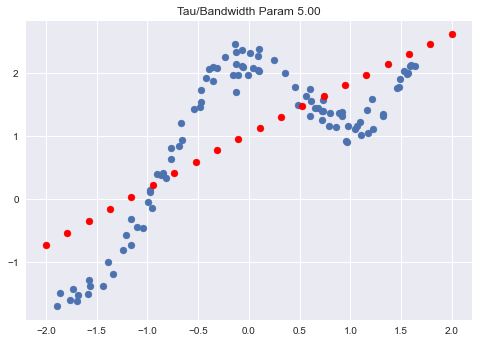

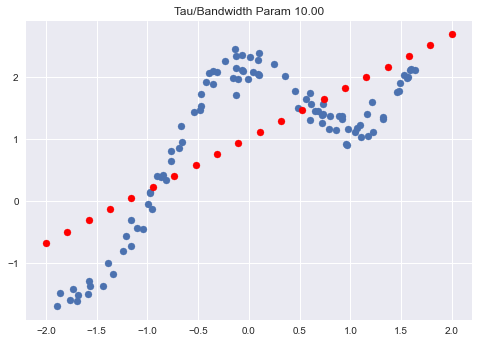

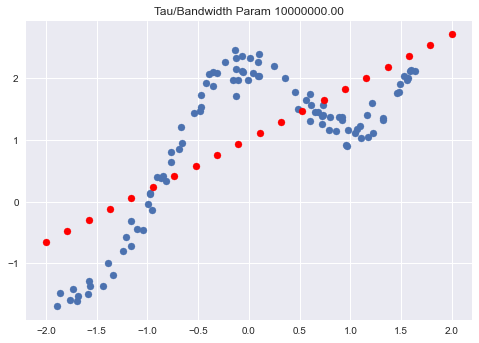

In [29]:
#As tau increases the algo is moving towards linear regression
taus = [0.1,0.5,1,5,10,10000000]
for t in taus:
    plotPrediction(t)